## Final Project Submission

Please fill out:
* Student name: Matt Pucci
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:


In [1518]:
#importing appropriate librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [1519]:
#load the Kansas City housing data
df = pd.read_csv('kc_house_data.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [1520]:
#From the above visual, you can see that date and sqft_basement have object string types.  Lets change date into an appropriate string type and think of ways to handle the sqft_basement values.
df['date'] = pd.to_datetime(df.date) #Lets check and see if we were successful.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [1521]:
#There are 454 observations that fall under '?'.  Lets see what we can find out from the sqft_basement value counts.
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
225.0         1
1284.0        1
506.0         1
2240.0        1
2720.0        1
518.0         1
2400.0        1
666.0         1
2570.0        1
906.0         1
935.0         1
1008.0        1
172.0         1
4820.0        1
1024.0        1
248.0         1
1913.0        1
652.0         1
2180.0        1
556.0         1
875.0         1
295.0         1
516.0         1
1481.0        1
3000.0        1
946.0         1
2850.0        1
207.0         1
283.0         1
143.0         1
Name: sqft_basement, Len

From the above visual we can see that 12,826 of the 21,597 (~60%) total obersations in '?' have values of 0.0 (house with no basement.  Given that only 454 of the 21,597 observations fall under '?' (~2%) lets assign the '?' values to zero (0.0)

In [1522]:
df.sqft_basement=df.sqft_basement.map(lambda x: '0' if x=='?' else x)
df.sqft_basement.value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
225.0         1
1284.0        1
506.0         1
2240.0        1
248.0         1
2300.0        1
518.0         1
2400.0        1
666.0         1
2570.0        1
906.0         1
935.0         1
1008.0        1
4820.0        1
143.0         1
1024.0        1
2720.0        1
283.0         1
1913.0        1
2180.0        1
556.0         1
875.0         1
295.0         1
516.0         1
1481.0        1
3000.0        1
946.0         1
2850.0        1
207.0         1
172.0         1
Name: sqft_basement, Len

All 454 '?' observations now fall under 0.0.  Lets now change the string type to float64.

In [1523]:
df.sqft_basement= df.sqft_basement.astype('float')
# Lets check to see if we have properly removed all 'Object' string types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

Another crucial step in insuring that our model performs to the best of its ability with the given data set is to check for any null values.

In [1524]:
print('Columns with Null Values:')
df.isna().sum()

Columns with Null Values:


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From this we can see that waterfront, view and yr_renovated are the only columns that contain null values.  The columns waterfront and view can be considered as a binary variable as they only take two values.  Ex: Is Waterfront/ is not waterfront or Has a view/Does not have a view.  For the yr_renovated column, we will assume that a null/missing value means that the house did not get renovated.  For the above reasons we will replace all the null values with 0 using the fillna() function.

In [1525]:
df.waterfront= df.waterfront.fillna(0)
df.view=df.view.fillna(0)
df.yr_renovated=df.yr_renovated.fillna(0)

Lets check to see if we replaced the null values correctly

In [1526]:
print('Columns with Null Values:')
df.isna().sum()

Columns with Null Values:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Since we made numerous changes to our dataset, its crucial to make a non-edited copy of our dataframe so we can compare our model to the original.  

In [1527]:
df_unedited_data=df.copy()

Lets now test for multi-collinearity.

In [1528]:
import pandas as pd
data=pd.read_csv('kc_house_data.csv')
data_pred=data.iloc[:,1:25]

In [1529]:
df.corr=data_pred.corr()
#Find the total number of correlations that are greater than .75. 
abs(data_pred.corr())>.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


Although the above chart has a lot of meaningful information behind it, it is quite difficult to interpret.  Lets visualize these results using a Seaborn Heatmap.  

Text(0.5, 1.0, 'Figure 1: Correlation Between House Differentiators')

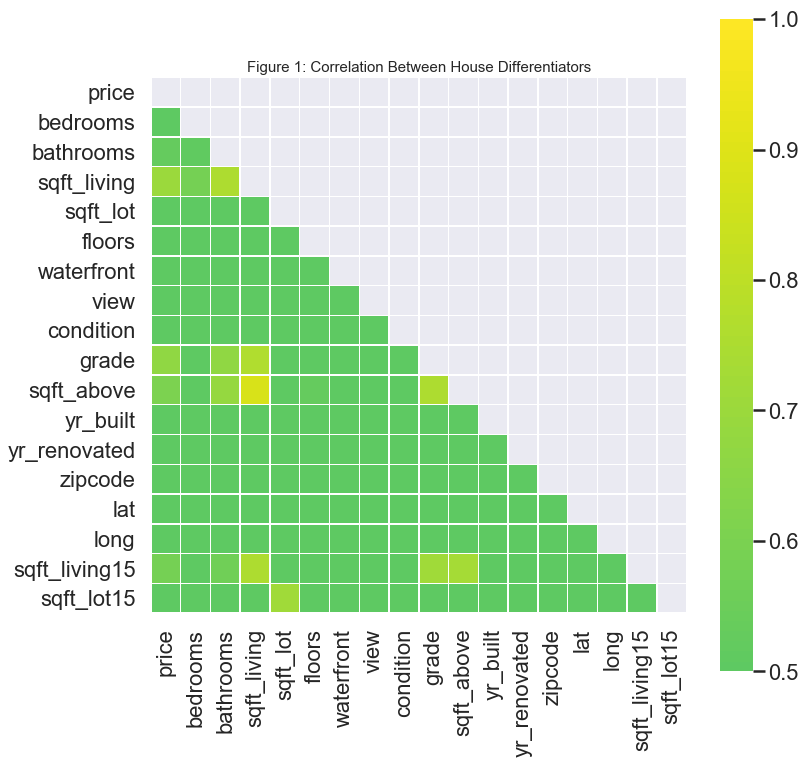

In [1530]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(df.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr, mask=mask, center=0, vmin=0.5, square=True, linewidths=.5, cmap='viridis')
sns.set_context('talk')
plt.title('Figure 1: Correlation Between House Differentiators', fontdict={'fontsize': 15})


Figure 1 shows us that there is a strong correlation between:
sqft_living and sqft_above
sqft_living and sqft_living15
sqft_living and grade


To improve our model, let's now remove sqft_above and sqft_living15.  

In [1531]:
df.drop('sqft_above', axis=1, inplace=True) #presents an error but sqft_above is dropped.

In [1532]:
df.drop('sqft_living15', axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c42d536a0>,
      dtype=object)

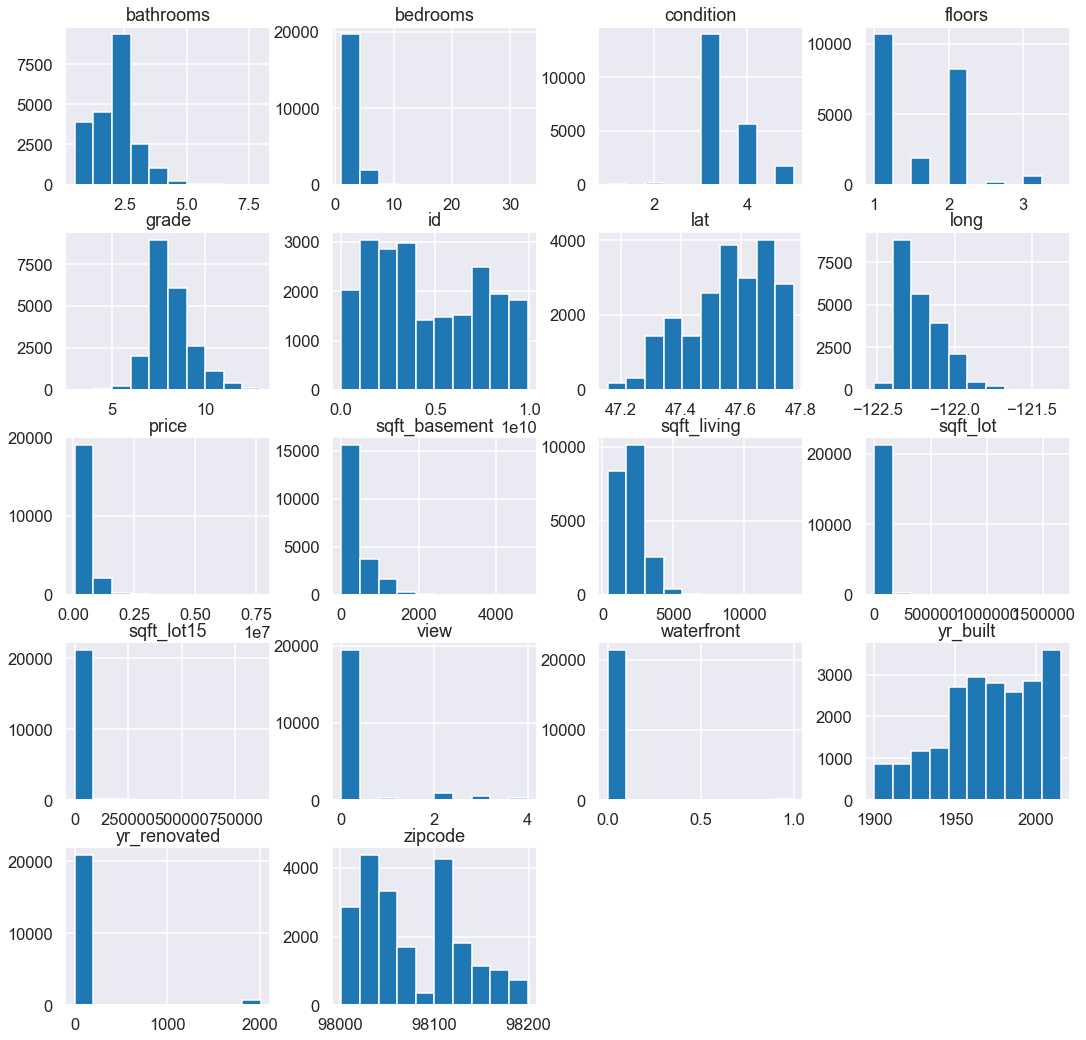

In [1533]:
df.hist(figsize=(18,18))

The above histograms show us that our two variables have been successfully dropped from our dataset.  The distributions upon first glance are not normal, this generally means some sort of outlier.  To improve our models accuracy it is imperative to better fit our data to our model.

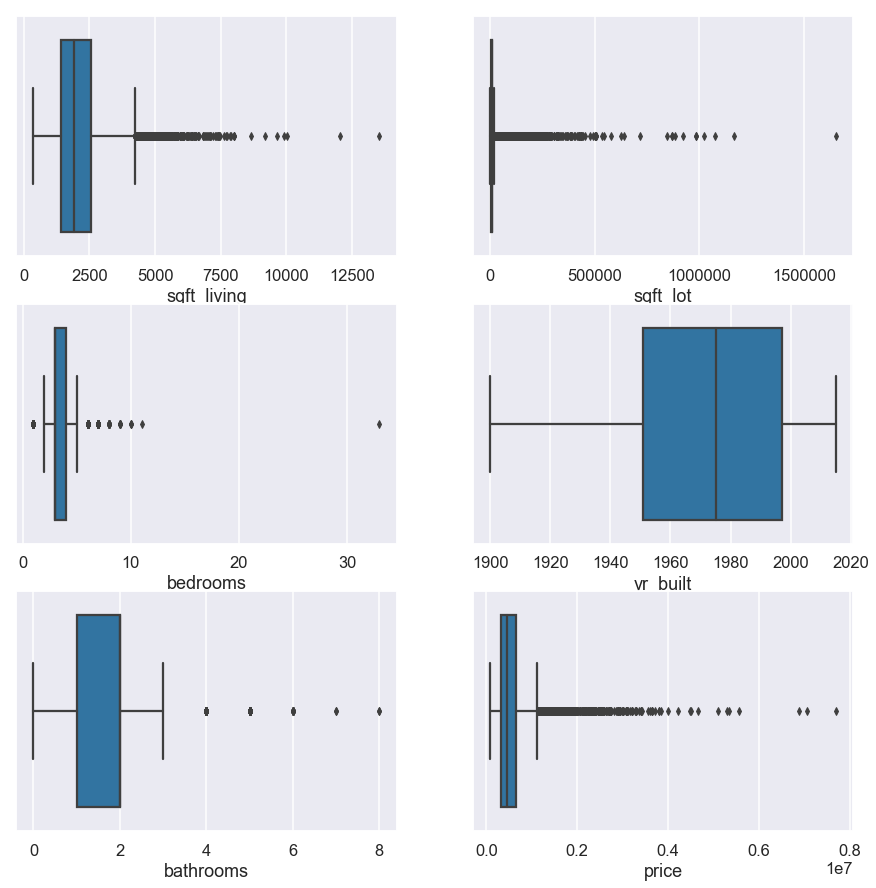

In [1534]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.boxplot(df.sqft_living)
plt.subplot(322)
sns.boxplot(df.sqft_lot)
plt.subplot(323)
sns.boxplot(df.bedrooms)
plt.subplot(324)
sns.boxplot(df.yr_built)
plt.subplot(325)
sns.boxplot(df.bathrooms.astype('int'))
plt.subplot(326)
sns.boxplot(df.price)

It is evident that our dataset has a significant amount of outliers as shown in the above boxplots. Any point to the right or left of the boxplot is an outlier.  Let's set appropriate ranges for the variables above given the boxplots. As shown in with df.info(), there are currently 21,597 total obesrvations.  Let's examine the distributions of these variables individually to make them better fit for our model.  

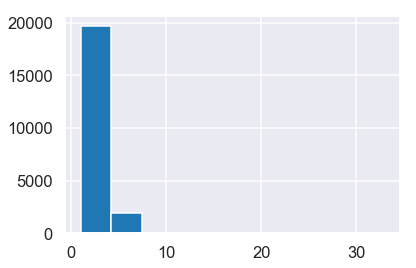

In [1535]:
df.bedrooms.hist()

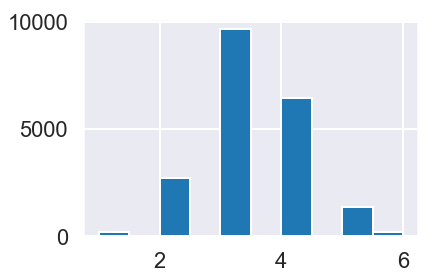

In [1603]:
df.drop(df.index[df['bedrooms'] >= 7], inplace=True) #removes all houses with 7+ bedrooms from the dataset.
df.bedrooms.hist()

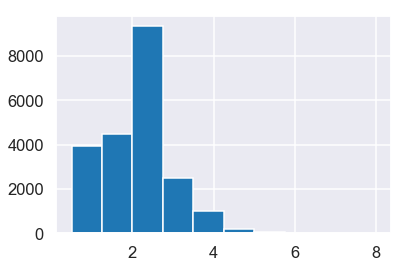

In [1537]:
df.bathrooms.hist()

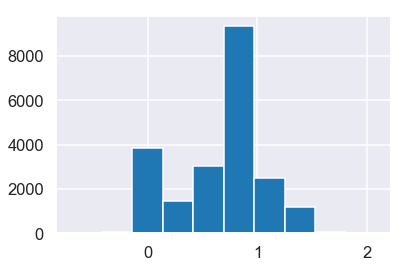

In [1538]:
#Simply removing houses with greater than 3/4 bathrooms will not suffice, lets try looking at the logged histogram of bathrooms.
(np.log(df.bathrooms)).hist()

In [1602]:
#Great, now lets now transform the bathroom data into log form
df.bathrooms = np.log(df.bathrooms)
df.drop(df.index[df['sqft_living'] > 4000], inplace=True)

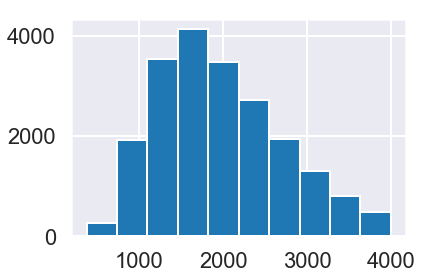

In [1598]:
df.sqft_living.hist()
df.drop(df.index[df['sqft_living'] > 4000], inplace=True)

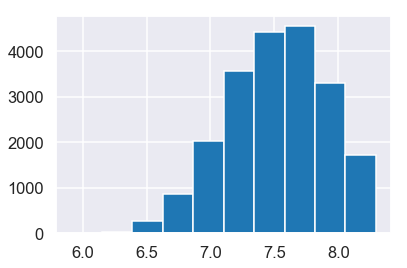

In [1541]:
(np.log(df.sqft_living)).hist()

In [1542]:
df.sqft_living=np.log(df.sqft_living)

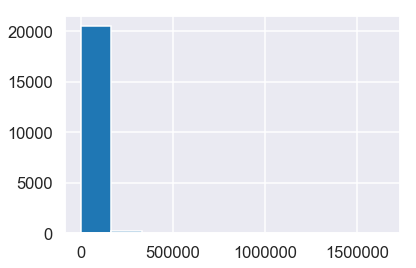

In [1543]:
df.sqft_lot.hist()

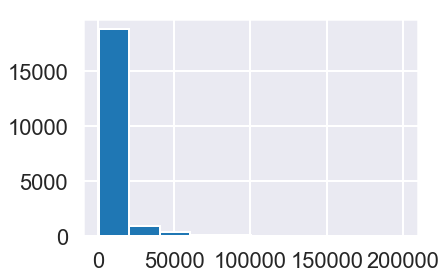

In [1596]:
df.drop(df.index[df['sqft_lot'] > 200000], inplace=True)
df.sqft_lot.hist()

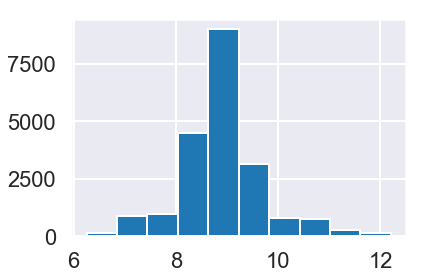

In [1597]:
#Lets take the log of the sqft_lot
(np.log(df.sqft_lot)).hist()
df.sqft_lot = np.log(df.sqft_lot)

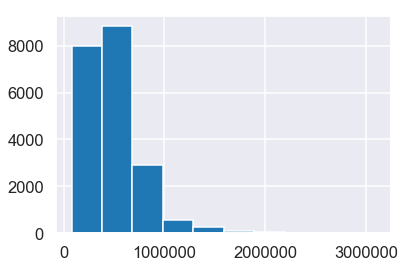

In [1546]:
df.price.hist()

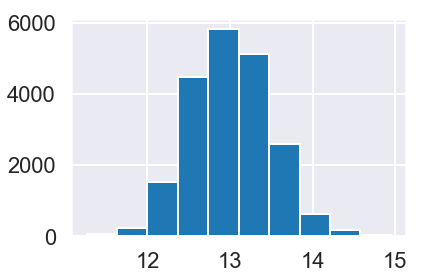

In [1595]:
(np.log(df.price)).hist()

In [1548]:
y=(np.log(df.price))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c67bba780>,
      dtype=object)

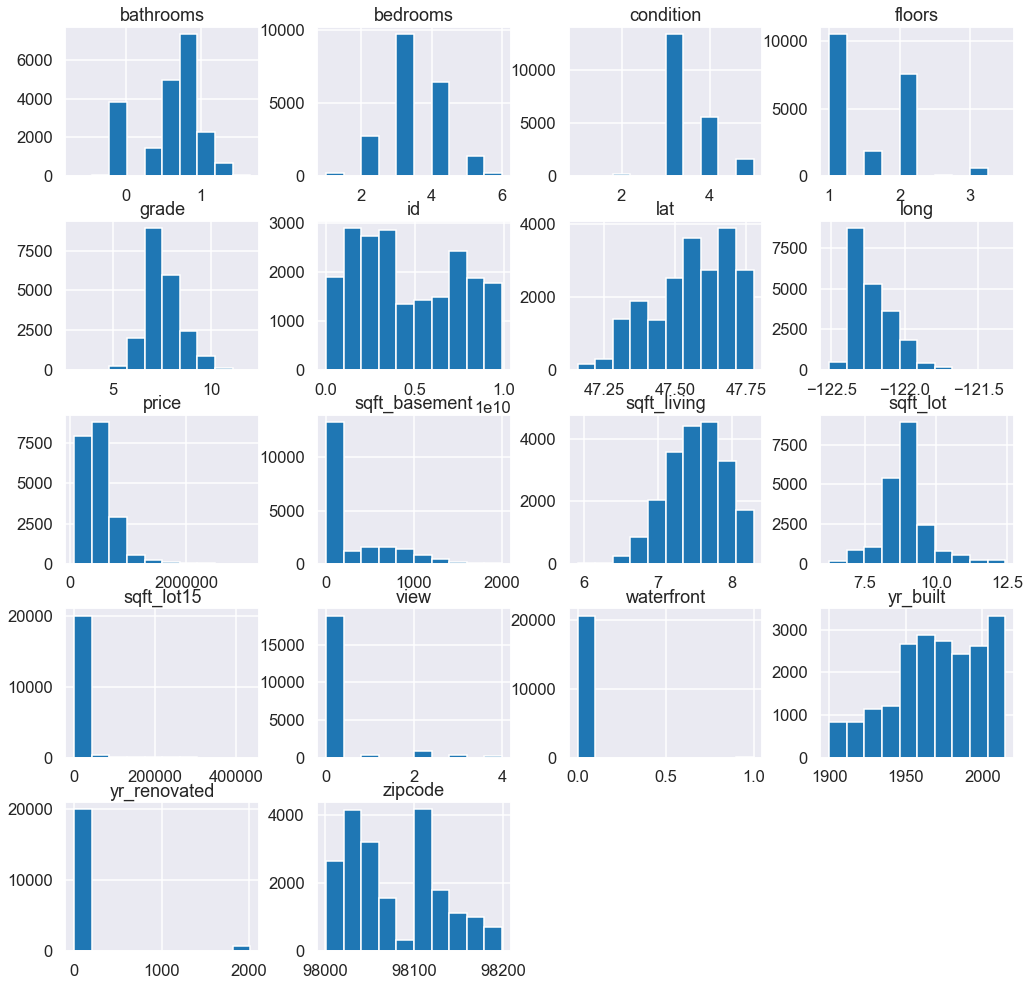

In [1549]:
df.hist(figsize=(17,17))

The above histograms show some of our variables depicting a much more normal distribution.  Lets look more deeply into ID, Long and Lat before we move forward. 

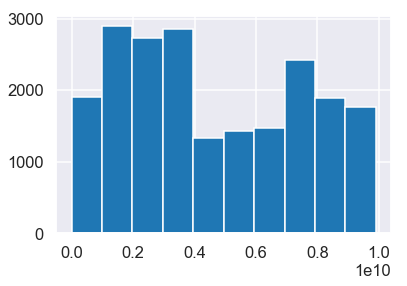

In [1550]:
df.id.hist()

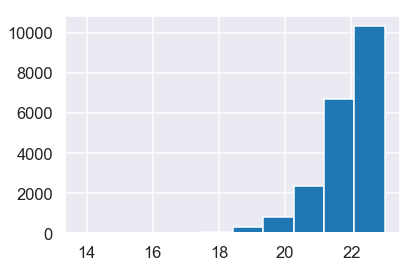

In [1551]:
(np.log(df.id)).hist() #Lets see what the distribution looks like if we take the log of 'id'.

This data is clearly skewed so lets drop it all together.  

In [1552]:
df.drop('id', axis=1, inplace=True)

In [1553]:
df.info()#checking to see if 'id' was properly dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20690 entries, 0 to 21596
Data columns (total 18 columns):
date             20690 non-null datetime64[ns]
price            20690 non-null float64
bedrooms         20690 non-null int64
bathrooms        20690 non-null float64
sqft_living      20690 non-null float64
sqft_lot         20690 non-null float64
floors           20690 non-null float64
waterfront       20690 non-null float64
view             20690 non-null float64
condition        20690 non-null int64
grade            20690 non-null int64
sqft_basement    20690 non-null float64
yr_built         20690 non-null int64
yr_renovated     20690 non-null float64
zipcode          20690 non-null int64
lat              20690 non-null float64
long             20690 non-null float64
sqft_lot15       20690 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(6)
memory usage: 3.0 MB


The distributions of Longitude and Latitude also seem a little odd, lets look further into their relationship with price.

Text(0.5, 1.0, 'Influence of Longitude and Latitude on House Prices')

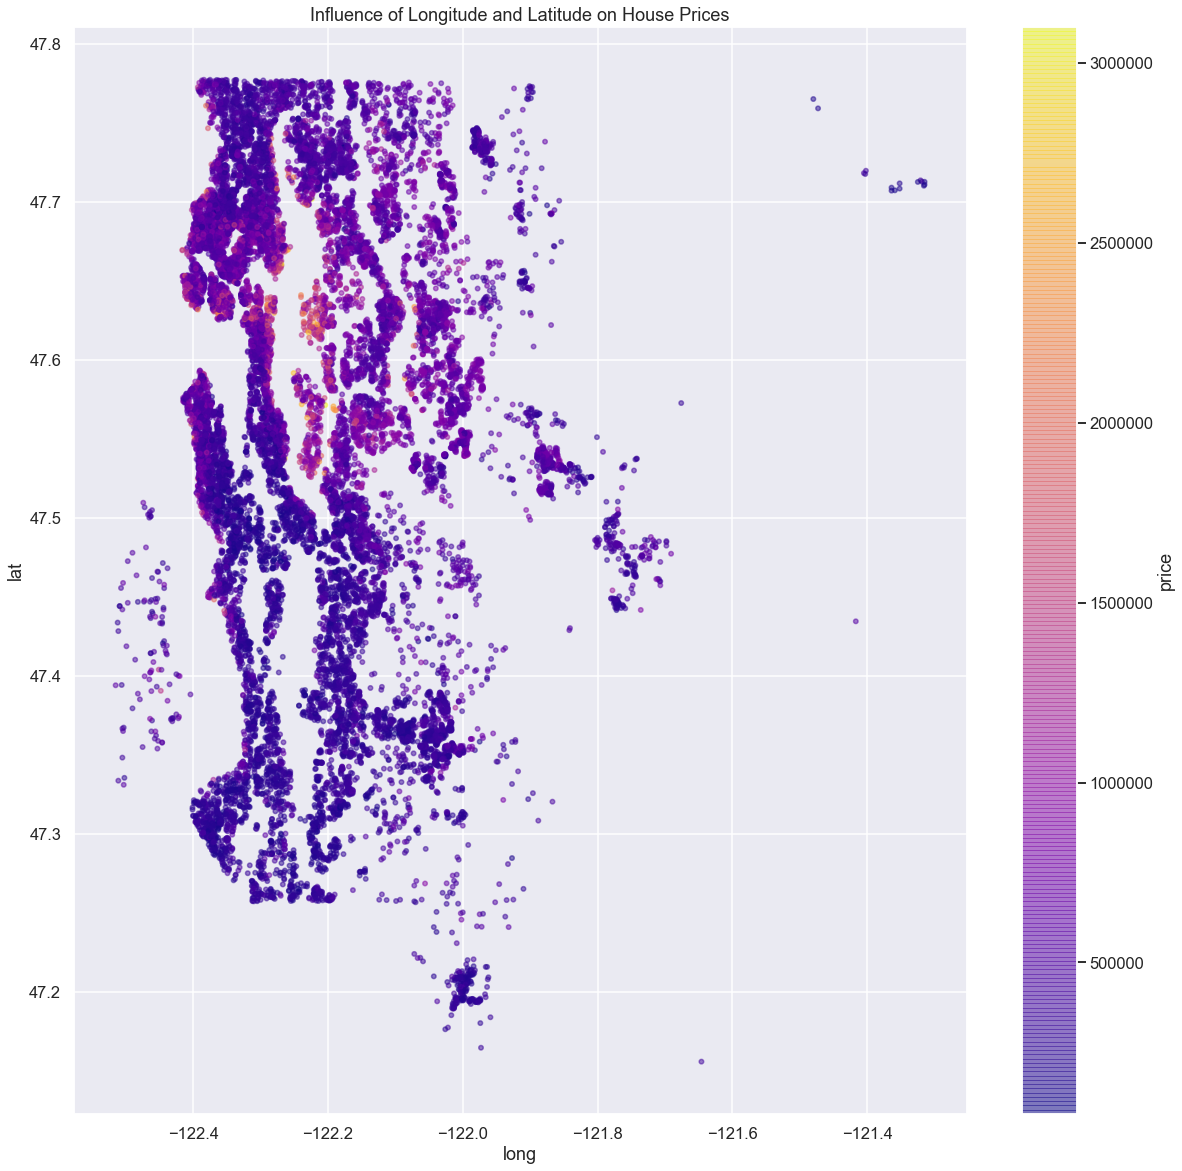

In [1554]:
df.plot(kind='scatter', x='long', y='lat', alpha=.5, figsize=(20,20), c='price', cmap='plasma', sharey=True, sharex=False)
plt.title('Influence of Longitude and Latitude on House Prices')

This shows a pretty interesting relationship between coordinates and prices of homes.  When checking on a map (-122.4, 47.3) is located in Tacoma, WA fairly close to the water.  When comparing the location to (-122.0, 47.7) it becomes clear that lower price of the home is due to its distance from the water and the city.  Showing that access to a bustling city life as well as outdoor recreation drives up prices.

# We will now try to answer the following questions:
What drives prices up?
How location is playing role?

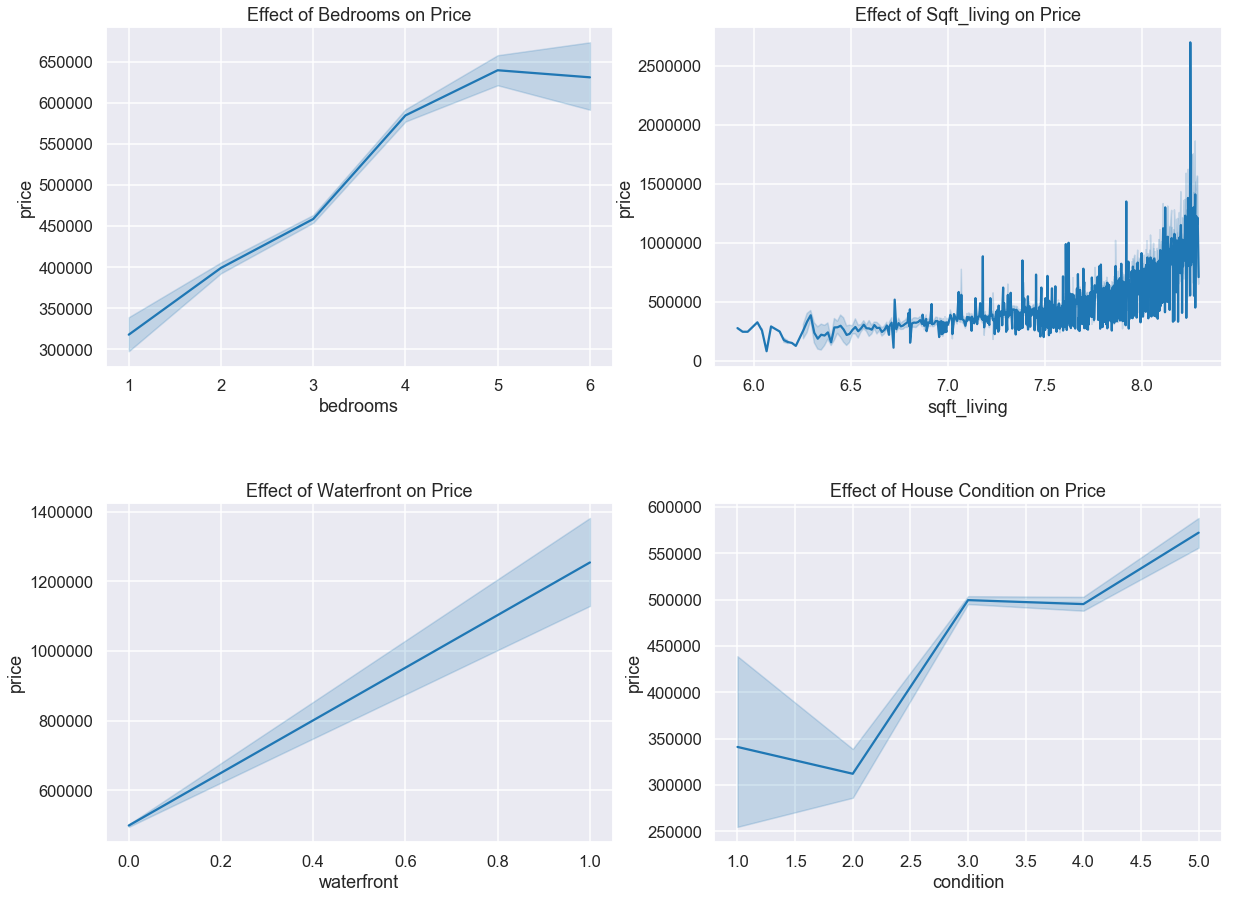

In [1556]:
import seaborn as sns #Looking into relationships between variables and price using a Seaborn Lineplot.
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.lineplot(df.bedrooms, df.price)
plt.title('Effect of Bedrooms on Price')
plt.subplot(222)
sns.lineplot(df.sqft_living, df.price)
plt.title('Effect of Sqft_living on Price')
plt.subplot(223)
sns.lineplot(df.waterfront, df.price)
plt.title('Effect of Waterfront on Price')
plt.subplot(224)
sns.lineplot(df.condition, df.price)
plt.title('Effect of House Condition on Price')


plt.subplots_adjust(hspace=0.40)
sns.set_style('darkgrid')
sns.color_palette('pastel')
plt.show()

All of the above lineplots show that condition, waterfront, sqft_living and bedrooms all drive prices up.  Let's look more in depth into the relationship between sqft_living and prices by creating Seaborn Scatterplots with sqft_living on the X axis and non_log_price on the y axis with our hue value as different variables that could pottentially play a role in the strong correlation between sqft_living and prices.

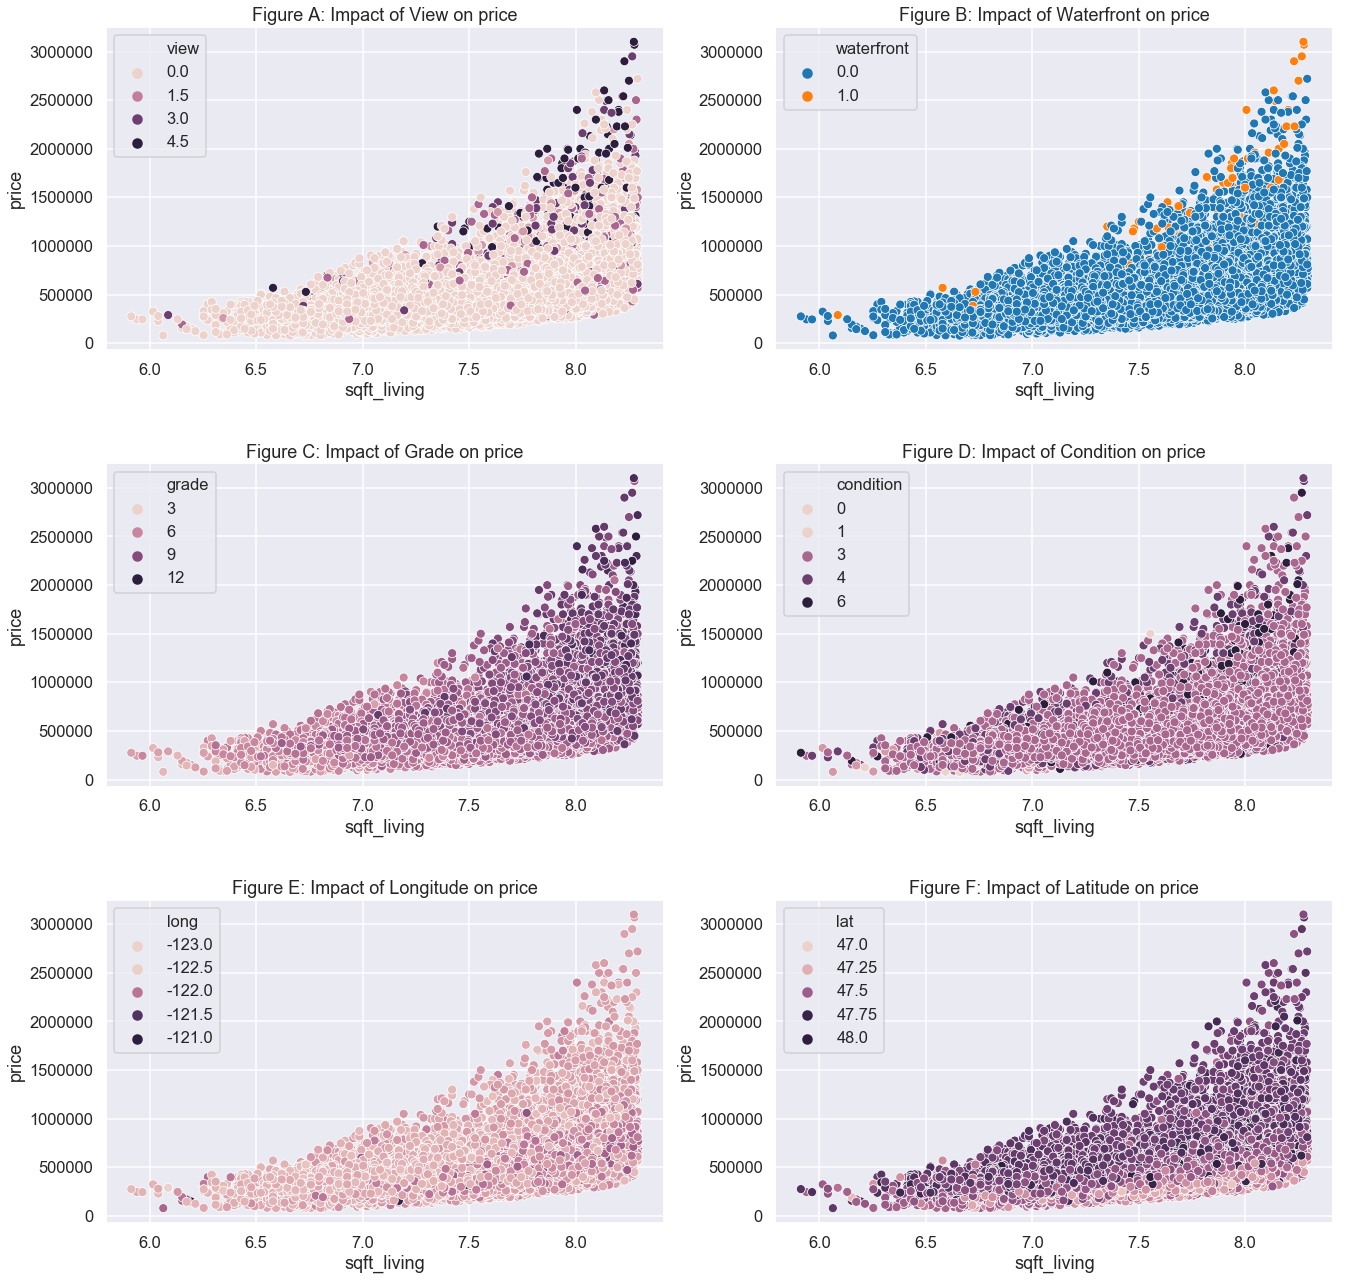

In [1557]:
import seaborn as sns
plt.figure(figsize=(22,22))

plt.subplot(321)
sns.scatterplot(df.sqft_living, df.price, hue=df.view)
plt.title('Figure A: Impact of View on price')
plt.subplot(322)
sns.scatterplot(df.sqft_living, df.price, hue=df.waterfront)
plt.title('Figure B: Impact of Waterfront on price')
plt.subplot(323)
sns.scatterplot(df.sqft_living, df.price, hue=df.grade)
plt.title('Figure C: Impact of Grade on price')
plt.subplot(324)
sns.scatterplot(df.sqft_living, df.price, hue=df.condition)
plt.title('Figure D: Impact of Condition on price')
plt.subplot(325)
sns.scatterplot(df.sqft_living, df.price, hue=df.long)
plt.title('Figure E: Impact of Longitude on price')
plt.subplot(326)
sns.scatterplot(df.sqft_living, df.price, hue=df.lat)
plt.title('Figure F: Impact of Latitude on price')

plt.subplots_adjust(hspace=0.35)
sns.set_style('darkgrid')
sns.set_context('poster')
plt.show()

The above Seaborn scatterplots highlight some interesting relationships that can help us better understand what drives prices up. 

- Figure A:  This figure shows us that as a house gets more views, the price may rise ever so slightly.  As square footage of the house increases, the effect of the number of views on price becomes stronger. 

- Figure B: This scatterplot shows us that general proximity to the water will drive prices up.  As the house size increases the effect of waterfront is more significant on prices. 

- Figure C: Figure C shows us that as the grade of the home increases, the square footage of the home tends to increase with it, both leading to higher prices. 

- Figure D:  Does not show a clear relationship proving that the condition of the house is significant driving force behind price.  

- Figure E:  Figure E allows us to further understand what kind of housing market Kings County is.  The amount of points on the scatterplot signifying Longitudes of -122 to -123 shows that this area is more densely populated than homes with the Longitude of -121 to -121.5.  When cross referencing these coordinates to a map it shows that as the Longitude approaches -123 the home is closer to Lake Washington, Lake Sammamish, Seattle and its subburbs.  Showing once again that proximity to outdoor recreation (in this case water) as well as close proximity to a bustling city drives prices up in Kings County. 

- Figure F:  Similar to Figure E, Figure F shows us some more information about the housing market and demographic breakdown of the county.  The scatterplot is filled with houses associated with the Latitudes of 47.5 to 48.  On a map this shows that as Lattitude increaes, the home becomes closer to Seattle as well as its surrounding Lakes and its price becomes more expensive.  

## We will now work to answer the following questions:
What is the best time to sell the house?
How to improve house to make larger return?

<Figure size 1440x1440 with 0 Axes>

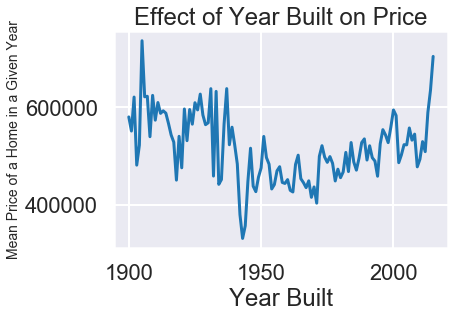

<Figure size 1440x1440 with 0 Axes>

In [1558]:
#Lets look into how the year of construction of a home correlates to its price.
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price of a Home in a Given Year', fontdict={'fontsize':14})
plt.title('Effect of Year Built on Price')
plt.figure(figsize=(20,20))

This shows that the year built has a major role in the price of the home.  This chart is not linear, so we will bin the years together in an attempt to have more clear results.  

In [1559]:
df.date = pd.to_datetime(df.date)

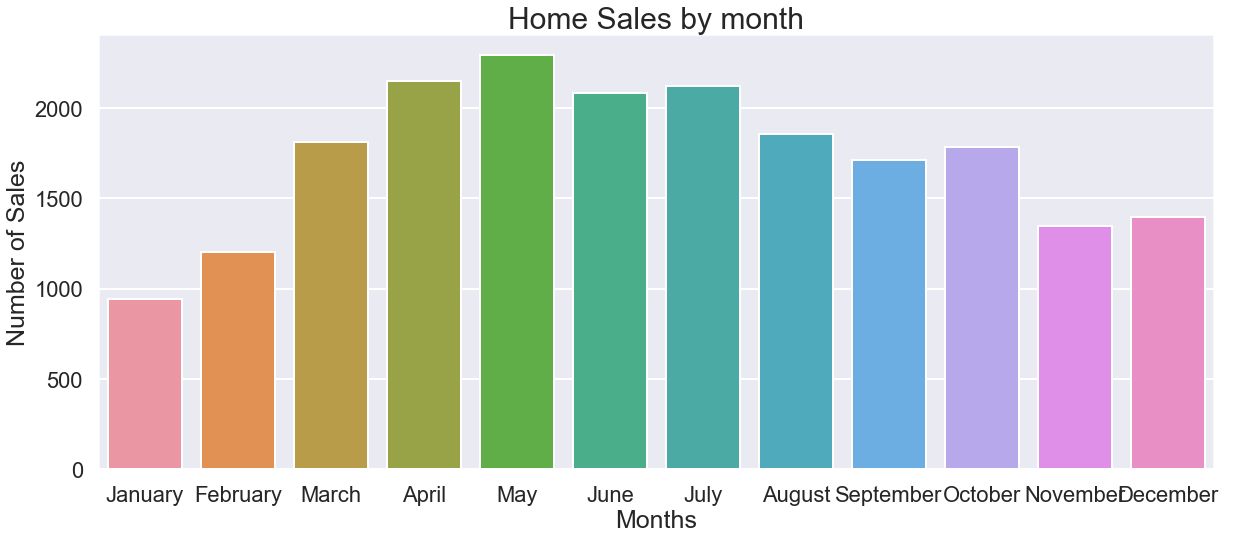

In [1560]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(20,8))
sns.barplot(months, monthly_sales)
plt.xlabel('Months', fontdict={'fontsize':25})
plt.ylabel('Number of Sales', fontdict={'fontsize':25})
plt.title('Home Sales by month', fontdict={'fontsize': 30})
plt.show()

The distribution of this data is normal, showing that most homes are bought in their highest quantity from April until August.  Possible explanations of this result:
- No one wants to move during the cold, lingering months of Winter.
- Public schools end classes traditionaly in May/June
- Public schools reopen in September/October

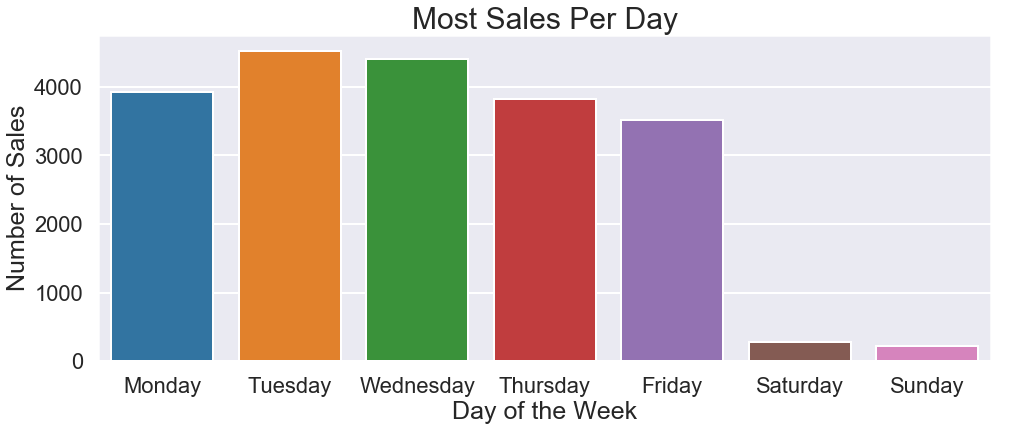

In [1561]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = []

for i in range(0,7):
    daily_sales.append(sum(df.date.dt.dayofweek == i))

plt.figure(figsize=(16,6))
sns.barplot(day_of_week,daily_sales)
plt.xlabel('Day of the Week', fontdict={'fontsize':25})
plt.ylabel('Number of Sales', fontdict={'fontsize':25})
plt.title('Most Sales Per Day', fontdict={'fontsize': 30})
plt.show()

The above visualizations show some interesting information on how month and day of the week play a roll in the sale of a home.  First and foremost, it is safe to say that a house is significantly more likely to be sold on a day of the week as compared to the weekend.   

# Developing the Model

In [1562]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_lot15       0
dtype: int64

In [1563]:
df.drop('waterfront',axis=1, inplace=True)
df.drop('yr_renovated', axis=1, inplace=True)

In [1564]:
df.drop('sqft_lot15', axis=1, inplace=True)
df.drop('zipcode', axis=1, inplace=True)
df.drop('condition', axis=1, inplace=True)
df.drop('grade', axis=1, inplace=True)
df.drop('yr_built', axis=1, inplace=True)

In [1565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20690 entries, 0 to 21596
Data columns (total 11 columns):
date             20690 non-null datetime64[ns]
price            20690 non-null float64
bedrooms         20690 non-null int64
bathrooms        20690 non-null float64
sqft_living      20690 non-null float64
sqft_lot         20690 non-null float64
floors           20690 non-null float64
view             20690 non-null float64
sqft_basement    20690 non-null float64
lat              20690 non-null float64
long             20690 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.9 MB


In [1566]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
sqft_basement    0
lat              0
long             0
dtype: int64

In [1567]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'sqft_basement', 'lat', 'long'],
      dtype='object')

In [1568]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
def forward_regression(X, y,
                       threshold_in=0.01,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        if not changed:
            break
    return included

In [1569]:
X = df.drop(['price','date'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)
i = 1
results_df = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

In [1570]:
forward_regression(X,y)

['sqft_living', 'lat', 'view', 'bedrooms', 'long', 'sqft_basement', 'floors']

In [1571]:
import sklearn as sk
import pandas as pd

In [1572]:
from sklearn import linear_model

In [1573]:
features=df.columns

In [1574]:
df = pd.DataFrame(data, columns=features)
target = pd.DataFrame(data, columns=["price"])

In [1575]:
df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
sqft_basement     0
lat               0
long              0
dtype: int64

In [1576]:
df.view=df.view.fillna(0)

In [1577]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
sqft_basement    0
lat              0
long             0
dtype: int64

In [1578]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20690 entries, 0 to 21596
Data columns (total 9 columns):
bedrooms         20690 non-null int64
bathrooms        20690 non-null float64
sqft_living      20690 non-null float64
sqft_lot         20690 non-null float64
floors           20690 non-null float64
view             20690 non-null float64
sqft_basement    20690 non-null float64
lat              20690 non-null float64
long             20690 non-null float64
dtypes: float64(8), int64(1)
memory usage: 1.6 MB


In [1605]:
y=df.price
y=np.log(y)

In [1607]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20690 entries, 0 to 21596
Data columns (total 9 columns):
bedrooms         20690 non-null int64
bathrooms        20690 non-null float64
sqft_living      20690 non-null float64
sqft_lot         20690 non-null float64
floors           20690 non-null float64
view             20690 non-null float64
sqft_basement    20690 non-null float64
lat              20690 non-null float64
long             20690 non-null float64
dtypes: float64(8), int64(1)
memory usage: 1.6 MB


In [1612]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [20690, 20562]

In [1609]:
predictions = lm.predict(X)
print((predictions)[0:15])

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [520]:
lm.score(X,y)

0.6424374907291462

In [521]:
lm.coef_

array([-4.50629841e-02,  4.45769740e-02,  7.63373392e-01, -3.59925239e-03,
        3.39502638e-02,  1.26635964e-01, -5.71702861e-05,  1.58796119e+00,
       -1.81434842e-01])